In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [492]:
class point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
    def __lt__(self, other):
        if self.y > other.y:
            return True
        elif self.y == other.y and self.x < other.x:
            return True
        else:
            return False
        
    def __eq__(self, other):
        return (self.x == other.x) & (self.y == other.y)
    
    def cross_prod(self, orig, dest):
        return (self.x - orig.x)*(dest.y-orig.y)-(self.y-orig.y)*(dest.x-orig.x)
        
    
class segment:
    def __init__(self, x1, y1, x2, y2):
        self.p1 = point(x1,y1)
        self.p2 = point(x2,y2)
        self.order()
    
    def __repr__(self):
        return f'{self.p1} -> {self.p2}'
    
    def __str__(self):
        return f'({self.p1} -> {self.p2})'
    
    def order(self):
        if self.p2 < self.p1:
            aux = self.p1
            self.p1 = self.p2
            self.p2 = aux
    
    def to_array(self):
        return [[self.p1.x,self.p1.y], [self.p2.x,self.p2.y]]
    
    def middle(self, y_new):
        alpha = (y_new - self.p2.y)/(self.p1.y - self.p2.y)
        #x_new = alpha*self.p1.x+(1-alpha)*self.p2.x
        x_new = self.p2.x + alpha*(self.p1.x - self.p2.x)
        return [round(x_new,4), round(y_new,4)]
    
    def __lt__(self, other):
        if isinstance(other, point):
            return middle(other.y) < other
    
    def exists_inter(self, s2):
        d0 = self.p1.cross_prod(s2.p1, s2.p2)
        d1 = self.p2.cross_prod(s2.p1, s2.p2)
        d2 = s2.p1.cross_prod(self.p1, self.p2)
        d3 = s2.p2.cross_prod(self.p1, self.p2)
        return (d0*d1 < 0) and (d2*d3 < 0)
        
    
    def find_inter(self, s2):
        if self.exists_inter(s2):
            [alpha, beta] = np.matmul(\
            np.linalg.inv(\
            np.matrix([\
            [self.p1.x-self.p2.x, s2.p2.x-s2.p1.x],[self.p1.y-self.p2.y, s2.p2.y-s2.p1.y]]))\
            ,np.matrix([[s2.p2.x-self.p2.x], [s2.p2.y-self.p2.y]]))
            return point(round(self.p2.x + float(alpha) * (self.p1.x - self.p2.x),4), \
                         round(self.p2.y + float(alpha) * (self.p1.y - self.p2.y),4))
        
            
        

In [775]:
class Node:
    def __init__(self, val, lc = None, rc = None, y = None, parent = None):
        self.val = val
        self.lc = lc
        self.rc = rc
        self.parent = parent
        if isinstance(self.val, segment):
            self.seg = val
            self.val = val.middle(y)
            
        
def insert(root, new , y = None, parent = None):
    if isinstance(new, segment):  
        test = new.middle(y)
        if root is None:
            return Node(new, y = y, parent = parent)
        elif test < root.val:
            root.lc = insert(root.lc, new, y, parent = root)
            return root
        else:
            root.rc = insert(root.rc, new, y, parent = root)
            return root
    else:
        if root is None:
            return Node(new)
        elif new < root.val:
            root.lc = insert(root.lc, new, parent = root)
        else:
            root.rc = insert(root.rc, new, parent = root)
        return root

def delete(root, ded):
    if root is not None:
        if hasattr(root, 'seg'):
            if ded == root.seg:
                if root.rc is not None:
                    if root.lc:
                        smallest = find_smallest_seg(root.rc)
                        if smallest == root.rc:
                            root.seg = root.rc.seg
                            root.val = root.rc.val
                            root.rc = root.rc.rc  
                        else:
                            new_seg = smallest.seg
                            new_val = smallest.val
                            delete(root.rc, new_seg)
                            root.seg = new_seg
                            root.val = new_val
                            root.rc.parent = root
                    else:
                        root.seg = root.rc.seg
                        root.val = root.rc.val
                        root.lc = root.rc.lc
                        root.rc = root.rc.rc                        
                elif root.lc != None:
                    root.seg = root.lc.seg
                    root.val = root.lc.val
                    root.rc = root.lc.rc
                    root.lc = root.lc.lc
                else:
                    if not root.parent:
                        root = None
                        #return None
            else:
                if root.lc:
                    if root.lc.seg == ded:
                        if root.lc.lc or root.lc.rc:
                            delete(root.lc, ded)
                        else:
                            root.lc = None
                    else: 
                        delete(root.lc, ded)
                
                if root.rc:
                    if root.rc.seg == ded:
                        if root.rc.lc or root.rc.rc:
                            delete(root.rc, ded)
                        else:
                            root.rc = None
                    else:
                        delete(root.rc, ded)

def update(root, y):
    root.val = root.seg.middle(y)
    if root.lc:
        update(root.lc, y)
    if root.rc:
        update(root.rc, y)
    
def find_smallest_seg(root):
    if root.lc == None:
        return root
    else:
        return find_smallest_seg(root.lc)
    
def find_largest_seg(root):
    if root.rc == None:
        return root
    else:
        return find_largest_seg(root.rc)

def find_p_left(root, p, node = None):
    if p[0] < root.val[0]:
        if root.rc:
            find_p_left(root.rc, p, root)
        else:
            return root
    else:
        if node:
            if root.lc:
                find_p_left(root.lc, p)
            else:
                return node
        else:
            if root.lc:
                find_p_left(root.lc,p)

def find_p_right(root, p, node = None):
    if p[0] > root.val[0]:
        if root.lc:
            find_p_right(root.lc, p, root)
        else:
            return root
    else:
        if node:
            if root.rc:
                find_p_right(root.rc, p)
            else:
                return node
        else:
            if root.rc:
                find_p_right(root.rc,p)
            
def find_node_seg(root, segm):
    if root.seg == segm:
        return root
    else:
        left = None
        right = None
        if root.lc:
            left = find_node(root.lc, seg)
        if root.rc:
            right = find_node(root.rc, seg)
        if left:
            return left
        else:
            return right
    
    
def inorder(root):
    result = [] 
    if root:
        result.extend(inorder(root.lc))
        if hasattr(root, 'seg'):
            result.append([root.val, root.seg])
        else:
            result.append(root.val)
        result.extend(inorder(root.rc))
    return result

def preorder(root):
    result = [] 
    if root:
        result.append((root.val))
        result.extend(inorder(root.lc))
        result.extend(inorder(root.rc))
    return result

def depth(root):
    if root is None:
        return 0
    return max(depth(root.lc), depth(root.rc)) + 1

def is_balanced(root):
    if root is None:
        return True
    left = depth(root.lc)
    right = depth(root.rc)
    if abs(left - right) < 2 and is_balanced(root.lc) and is_balanced(root.rc):
        return True
    return False

def BBT(x):
    if len(x) == 0:
        return None
    mid = len(x) >> 1
    newRoot = Node(x[mid])
    newRoot.lc = BBT(x[:mid])
    newRoot.rc = BBT(x[mid+1:])
    return newRoot



In [776]:
x = np.random.rand(10,2)
x = x[np.lexsort([x[:,0],-x[:,1]])]

ini = [x]

r = BBT(x)
inorder(r)

[array([0.13533715, 0.68768759]),
 array([0.5504083 , 0.68009143]),
 array([0.75671634, 0.66411415]),
 array([0.19977866, 0.55742453]),
 array([0.49245186, 0.53757344]),
 array([0.34677171, 0.40858806]),
 array([0.23514455, 0.22944216]),
 array([0.04606485, 0.19109369]),
 array([0.22421824, 0.15074668]),
 array([0.21878085, 0.02567612])]

In [777]:
def to_segments(x):
    mid = len(x) >> 1
    ini = x[:mid]
    fin = x[mid:]
    return ini,fin

In [778]:
class sweeper:
    def __init__(self, x):
        self.segs = x
        self.intersections = []
        self.aux = []
        
        self.ini = []
        self.fin = []
        x_ord = []
        for i in range(len(x)):
            arr = x[i].to_array()
            x_ord.extend(arr)
            self.ini.append([arr[0], self.segs[i]])
            self.fin.append([arr[1], self.segs[i]])
        x_ord = np.array(x_ord)
        x_ord = x_ord[np.lexsort([-x_ord[:,0],x_ord[:,1]])]
        self.events = x_ord.tolist()
        self.tau = None
        self.line = None
        
    def findInter(self, view = True):
        while len(self.events):
            change = True
            aux = self.line
            self.line = self.events.pop()
            print(f'Revisando punto: {self.line}')
            self.manipulate_p()
            if view == True:
                if aux:
                    if aux[1] == self.line[1]:
                        change = False
                self.plot(change)
                
    def manipulate_p(self):
        testing = [x[1] for x in inorder(self.tau)]
        if len(testing) != len(set(testing)):
            print(1000*'!')
        
        U_p = [p for p in self.ini if p[0] == self.line]
        L_p = [p for p in self.fin if p[0] == self.line]
        aux_l = [x[1] for x in L_p]
        if self.tau:
            update(self.tau, self.line[1])
        C_p = [p for p in inorder(self.tau) if \
               (p[1].middle(self.line[1])[0] > self.line[0] - 0.001 and p[1].middle(self.line[1])[0] < self.line[0] + 0.001) \
                and p[1] not in aux_l]
        
        if len(U_p)+len(L_p)+len(C_p) > 1:
            temp = [self.line]
            temp.append([x[1] for x in U_p])
            temp.append([x[1] for x in C_p])
            temp.append([x[1] for x in L_p])
            self.intersections.append(temp)
        
        for p in L_p:
            if len(inorder(self.tau)) == 1:
                self.tau = None
            else:
                delete(self.tau, p[1])
        for p in C_p:
            delete(self.tau, p[1])
        for p in U_p:
            if self.tau == None:
                self.tau = Node(p[1], y=self.line[1]-.005)
            else:
                insert(self.tau, p[1], y=self.line[1]-.005)    
        for p in C_p:
            insert(self.tau, p[1], y=self.line[1]-.005)
        
        if len(U_p)+len(C_p) == 0:
            if self.tau != None:
                sl = find_p_left(self.tau, self.line)
                sr = find_p_right(self.tau, self.line)   
                if sl and sr:
                    self.find_event(sl, sr, self.line)
        else:
            aux_u = [x[1] for x in U_p]
            aux_c = [x[1] for x in C_p]
            points = inorder(self.tau)
            aux_ps = [x for x in points if x[1] in aux_u or x[1] in aux_c]
            if len(aux_ps) > 1:
                aux_ps =  sorted(aux_ps, key=lambda x: (x[0][0],))
                sl = aux_ps[0][1]
                sr = aux_ps[-1][1]
                indl = points.index(aux_ps[0])
                indr = points.index(aux_ps[-1])
                if indl > 0:
                    self.find_event(sl, points[indl-1][1], self.line)
                if indr < len(points)-1:
                    self.find_event(sr, points[indr+1][1], self.line)
                
            elif len(aux_ps) == 1:
                ind = points.index(aux_ps[0])
                if points != aux_ps:
                    if ind == 0:
                        self.find_event(aux_ps[0][1], points[ind+1][1], self.line)
                    elif ind == len(points)-1:
                        self.find_event(points[ind-1][1], aux_ps[0][1], self.line)
                    else:
                        self.find_event(aux_ps[0][1], points[ind+1][1], self.line)
                        self.find_event(points[ind-1][1], aux_ps[0][1], self.line)
            else:
                print('Tercer caso' + 100*'!')
                
    def find_event(self, sl, sr, p):
        p = point(p[0], p[1])
        new = sl.find_inter(sr)
        if new and p < new:
            self.events.append([round(new.x,4), round(new.y,4)])
            self.events =  sorted(self.events, key=lambda x: (x[1], -x[0]))
            self.aux.append([new.x, new.y])

    def plot(self, change=True):
        for p, seg in self.ini:
            plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y])
        if self.line and change:
            plt.axhline(self.line[1])

        

Revisando punto: [0.4795, 0.9811]
Revisando punto: [0.8412, 0.9431]
Revisando punto: [0.5147, 0.9024]
Revisando punto: [0.5093, 0.8906]
[[[0.507, 0.8856], (0.5147,0.9024) -> (0.2591,0.3454)], [[0.5109, 0.8856], (0.4795,0.9811) -> (0.6433,0.4832)]]
Revisando punto: [0.1609, 0.5918]
Revisando punto: [0.6222, 0.5474]
[[[0.6194, 0.5424], (0.8412,0.9431) -> (0.4288,0.1981)], [[0.6238, 0.5424], (0.4795,0.9811) -> (0.6433,0.4832)]]
Revisando punto: [0.6222, 0.5474]
[[[0.6194, 0.5424], (0.8412,0.9431) -> (0.4288,0.1981)], [[0.6238, 0.5424], (0.4795,0.9811) -> (0.6433,0.4832)]]
Revisando punto: [0.6433, 0.4832]
Revisando punto: [0.3201, 0.4783]
[[[0.3178, 0.4733], (0.5147,0.9024) -> (0.2591,0.3454)], [[0.3272, 0.4733], (0.1609,0.5918) -> (0.739,0.1798)]]
Revisando punto: [0.5172, 0.4349]
Revisando punto: [0.4954, 0.3534]
[[[0.4941, 0.3484], (0.5172,0.4349) -> (0.4047,0.0134)], [[0.5024, 0.3484], (0.1609,0.5918) -> (0.739,0.1798)]]
Revisando punto: [0.2591, 0.3454]
Revisando punto: [0.5093, 0.34

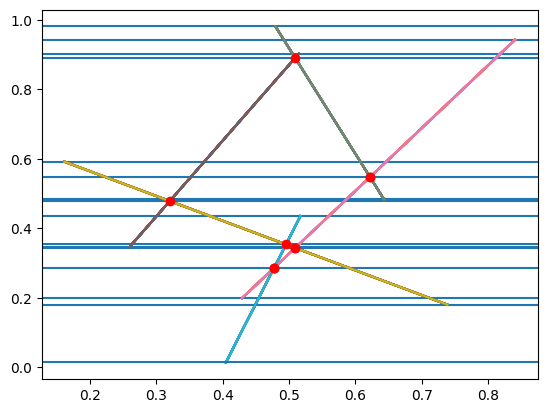

In [771]:
x2 = np.random.rand(10,2)
x2 = np.around(x2, 4) # Solo estoy revisando para 4 decimales
ini, fin = to_segments(x2)
segmentos = []
for i in range(len(ini)):
    segmentos.append(segment(ini[i][0], ini[i][1], fin[i][0], fin[i][1]))
linea = sweeper(segmentos)
linea.findInter()
print('sup')
print(linea.intersections)
print(linea.aux)
print('Puntos')
for p in linea.intersections:
    plt.plot(p[0][0], p[0][1], 'ro')

In [772]:
import pandas as pd

In [773]:
df = pd.read_csv('segmentos.csv')
df

,x0,y0,x1,y1
0,0.517,0.947,0.765,0.282
1,0.221,0.686,0.167,0.392
2,0.618,0.412,0.002,0.884
3,0.885,0.300,0.590,0.978
4,0.845,0.065,0.295,0.288
5,0.822,0.626,0.110,0.001
6,0.942,0.142,0.422,0.346
7,0.870,0.429,0.829,0.718
8,0.119,0.596,0.130,0.078
9,0.831,0.464,0.162,0.548


Revisando punto: [0.59, 0.978]
Revisando punto: [0.517, 0.947]
Revisando punto: [0.002, 0.884]
Revisando punto: [0.829, 0.718]
Revisando punto: [0.221, 0.686]
Revisando punto: [0.822, 0.626]
Revisando punto: [0.119, 0.596]
Revisando punto: [0.7649, 0.5759]
Revisando punto: [0.162, 0.548]
Revisando punto: [0.1949, 0.5439]
Revisando punto: [0.4951, 0.5062]
Revisando punto: [0.4951, 0.5062]
Revisando punto: [0.6824, 0.5035]
Revisando punto: [0.6617, 0.4853]
Revisando punto: [0.6905, 0.4816]
Revisando punto: [0.6905, 0.4816]
Revisando punto: [0.8126, 0.4663]
Revisando punto: [0.8126, 0.4663]
Revisando punto: [0.8126, 0.4663]
Revisando punto: [0.831, 0.464]
Revisando punto: [0.87, 0.429]
Revisando punto: [0.5968, 0.4283]
Revisando punto: [0.618, 0.412]
Revisando punto: [0.167, 0.392]
Revisando punto: [0.422, 0.346]
Revisando punto: [0.478, 0.324]
Revisando punto: [0.885, 0.3]
Revisando punto: [0.295, 0.288]
Revisando punto: [0.765, 0.282]
Revisando punto: [0.3921, 0.2486]
Revisando punto: [

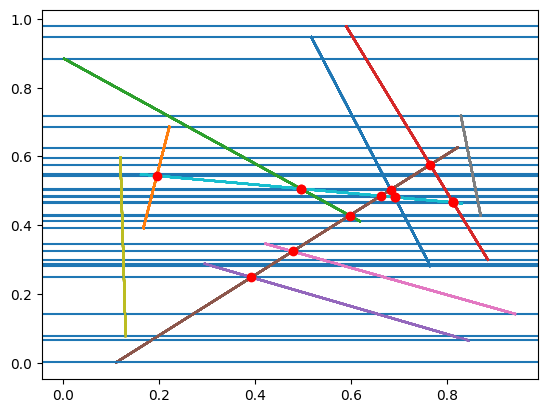

In [779]:
segmentos = []
for i in range(len(df)):
    segmentos.append(segment(df['x0'][i], df['y0'][i], df['x1'][i], df['y1'][i]))
linea = sweeper(segmentos)
linea.findInter()
print('sup')
print(linea.intersections)
print(linea.aux)
print('Puntos')
for p in linea.intersections:
    plt.plot(p[0][0], p[0][1], 'ro')